# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)



## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(cities)

['ribeira grande', 'beloha', 'mahebourg', 'rikitea', 'pisco', 'santa vitoria do palmar', 'samusu', 'cap malheureux', 'macaboboni', 'katsuura', 'castro', 'sassandra', 'sur', 'saldanha', 'puri', 'ahipara', 'cape town', 'cabo san lucas', 'bluff', 'tasiilaq', 'hovd', 'vaini', 'karamea', 'longyearbyen', 'taoudenni', 'punta arenas', 'belushya guba', 'ushuaia', 'avarua', 'winona', 'roura', 'tuktoyaktuk', 'ostrovnoy', 'alice town', 'morondava', 'georgetown', 'nanortalik', 'barrow', 'jamestown', 'samarai', 'puerto ayora', 'isangel', 'saint george', 'el balyana', 'nemuro', 'hermanus', 'atasu', 'trenggalek', 'grindavik', 'lebu', 'karaul', 'busselton', 'mataura', 'taolanaro', 'klaksvik', 'new norfolk', 'yulara', 'chipinge', 'nuuk', 'los llanos de aridane', 'nelson bay', 'dingle', 'chisinau', 'bajil', 'kambia', 'jiaocheng', 'arlit', 'nikolskoye', 'kapaa', 'khatanga', 'hilo', 'skagastrond', 'hambantota', 'baker city', 'aykhal', 'ballina', 'atuona', 'fagersta', 'norman wells', 'kodiak', 'hobart', 'ul

In [3]:
#create new data frame with cities
weather_df = pd.DataFrame({'City':cities,"Cloudiness":"","Country":"","Date":"","Humidity":"","Lat":"","Lng":"","Max Temp":"","Wind Speed":""})
weather_df


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,ribeira grande,,,,,,,,
1,beloha,,,,,,,,
2,mahebourg,,,,,,,,
3,rikitea,,,,,,,,
4,pisco,,,,,,,,
5,santa vitoria do palmar,,,,,,,,
6,samusu,,,,,,,,
7,cap malheureux,,,,,,,,
8,macaboboni,,,,,,,,
9,katsuura,,,,,,,,


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
for index, row in weather_df.iterrows():
    
    city = row['City']
    
    try:

        # Save config information
        url = "http://api.openweathermap.org/data/2.5/weather?"

        # Build query URL
        query_url = url + "appid=" + api_key + "&units=imperial"+ "&q=" + city

        # Get weather data
        weather_response = requests.get(query_url)
        weather_json = weather_response.json()

        # Get the temperature from the response
        print(f"The weather API responded with: {weather_json}.")

        Cloudiness = weather_json['clouds']['all']
        Country = weather_json['sys']['country']
        Date = weather_json["dt"]
        Humidity = weather_json['main']['humidity']
        Lat = weather_json['coord']['lat']
        Lng = weather_json['coord']['lon']
        Max_Temp = weather_json['main']['temp_max']
        Wind_Speed = weather_json['wind']['speed']

        print(f"The results for {city} are:")
        print(Cloudiness)
        print(Country)
        print(Date)
        print(Humidity)
        print(Lat)
        print(Lng)
        print(Max_Temp)
        print(Wind_Speed)

    except KeyError:

        print("No City Found")


    weather_df.loc[index, "Cloudiness"] = Cloudiness
    weather_df.loc[index, "Country"] = Country
    weather_df.loc[index, "Date"] = Date
    weather_df.loc[index, "Humidity"] = Humidity
    weather_df.loc[index, "Lat"] = Lat
    weather_df.loc[index, "Lng"] = Lng
    weather_df.loc[index, "Max Temp"] = Max_Temp
    weather_df.loc[index, "Wind Speed"] = Wind_Speed

print("All searches complete")
weather_df


The weather API responded with: {'coord': {'lon': -28.7, 'lat': 38.52}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 59, 'pressure': 1030, 'humidity': 72, 'temp_min': 59, 'temp_max': 59}, 'visibility': 10000, 'wind': {'speed': 14.99, 'deg': 160}, 'clouds': {'all': 40}, 'dt': 1552597200, 'sys': {'type': 1, 'id': 6883, 'message': 0.0038, 'country': 'PT', 'sunrise': 1552550801, 'sunset': 1552593688}, 'id': 3372707, 'name': 'Ribeira Grande', 'cod': 200}.
The results for ribeira grande are:
40
PT
1552597200
72
38.52
-28.7
59
14.99
The weather API responded with: {'coord': {'lon': 45.06, 'lat': -25.17}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 71.93, 'pressure': 1016.05, 'humidity': 78, 'temp_min': 71.93, 'temp_max': 71.93, 'sea_level': 1016.05, 'grnd_level': 999.9}, 'wind': {'speed': 12.48, 'deg': 108.501}, 'clouds': {'all': 

The weather API responded with: {'coord': {'lon': 149.07, 'lat': -23.58}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 72.38, 'pressure': 1011.41, 'humidity': 85, 'temp_min': 72.38, 'temp_max': 72.38, 'sea_level': 1011.41, 'grnd_level': 989.02}, 'wind': {'speed': 5.77, 'deg': 18.0008}, 'clouds': {'all': 20}, 'dt': 1552602324, 'sys': {'message': 0.0048, 'country': 'AU', 'sunrise': 1552507500, 'sunset': 1552551617}, 'id': 2175403, 'name': 'Bluff', 'cod': 200}.
The results for bluff are:
20
AU
1552602324
85
-23.58
149.07
72.38
5.77
The weather API responded with: {'coord': {'lon': -37.64, 'lat': 65.61}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 23, 'pressure': 989, 'humidity': 79, 'temp_min': 23, 'temp_max': 23}, 'wind': {'speed': 5.82, 'deg': 260}, 'clouds': {'all': 80}, 'dt': 1552600200, 'sys': {'type': 1, 'id': 81, 'messag

The weather API responded with: {'coord': {'lon': 44.28, 'lat': -20.3}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 78.59, 'pressure': 1013.25, 'humidity': 100, 'temp_min': 78.59, 'temp_max': 78.59, 'sea_level': 1013.25, 'grnd_level': 1007.5}, 'wind': {'speed': 4.32, 'deg': 216.501}, 'clouds': {'all': 8}, 'dt': 1552602326, 'sys': {'message': 0.0047, 'country': 'MG', 'sunrise': 1552532699, 'sunset': 1552576711}, 'id': 1058381, 'name': 'Morondava', 'cod': 200}.
The results for morondava are:
8
MG
1552602326
100
-20.3
44.28
78.59
4.32
The weather API responded with: {'coord': {'lon': -58.16, 'lat': 6.8}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 83.46, 'pressure': 1011, 'humidity': 69, 'temp_min': 82.4, 'temp_max': 84.2}, 'visibility': 10000, 'wind': {'speed': 9.17, 'deg': 60}, 'clouds': {'all': 40}, 'dt': 1552600800, 'sys'

The weather API responded with: {'coord': {'lon': 38.73, 'lat': 8.96}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 60.8, 'pressure': 1027, 'humidity': 63, 'temp_min': 60.8, 'temp_max': 60.8}, 'visibility': 10000, 'wind': {'speed': 2.24, 'deg': 340}, 'clouds': {'all': 20}, 'dt': 1552600800, 'sys': {'type': 1, 'id': 2453, 'message': 0.0041, 'country': 'ET', 'sunrise': 1552534335, 'sunset': 1552577764}, 'id': 344979, 'name': 'Lebu', 'cod': 200}.
The results for lebu are:
20
ET
1552600800
63
8.96
38.73
60.8
2.24
The weather API responded with: {'cod': '404', 'message': 'city not found'}.
No City Found
The weather API responded with: {'coord': {'lon': 115.35, 'lat': -33.64}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 58.87, 'pressure': 1006, 'humidity': 49, 'temp_min': 55, 'temp_max': 62.01}, 'wind': {'speed': 11.81, 'deg': 84.0008}

The weather API responded with: {'coord': {'lon': 7.39, 'lat': 18.74}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 76.7, 'pressure': 1012.77, 'humidity': 42, 'temp_min': 76.7, 'temp_max': 76.7, 'sea_level': 1012.77, 'grnd_level': 961.58}, 'wind': {'speed': 5.77, 'deg': 342.501}, 'clouds': {'all': 68}, 'dt': 1552602336, 'sys': {'message': 0.0032, 'country': 'NE', 'sunrise': 1552541944, 'sunset': 1552585204}, 'id': 2447513, 'name': 'Arlit', 'cod': 200}.
The results for arlit are:
68
NE
1552602336
42
18.74
7.39
76.7
5.77
The weather API responded with: {'coord': {'lon': 30.79, 'lat': 59.7}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 31.5, 'pressure': 1002, 'humidity': 90, 'temp_min': 30.99, 'temp_max': 32}, 'visibility': 10000, 'wind': {'speed': 11.18, 'deg': 140}, 'clouds': {'all': 20}, 'dt': 1552602335, 'sys': {'type': 1, '

The weather API responded with: {'coord': {'lon': 106.92, 'lat': 47.92}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 12.2, 'pressure': 1019, 'humidity': 72, 'temp_min': 12.2, 'temp_max': 12.2}, 'visibility': 10000, 'wind': {'speed': 2.24}, 'clouds': {'all': 40}, 'dt': 1552600800, 'sys': {'type': 1, 'id': 9644, 'message': 0.0034, 'country': 'MN', 'sunrise': 1552518422, 'sunset': 1552560996}, 'id': 2028462, 'name': 'Ulaanbaatar', 'cod': 200}.
The results for ulaanbaatar are:
40
MN
1552600800
72
47.92
106.92
12.2
2.24
The weather API responded with: {'cod': '404', 'message': 'city not found'}.
No City Found
The weather API responded with: {'coord': {'lon': 116.27, 'lat': -8.71}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 77, 'pressure': 1011, 'humidity': 94, 'temp_min': 77, 'temp_max': 77}, 'visibility': 7000, 'wind': {

The weather API responded with: {'coord': {'lon': 153.62, 'lat': -28.65}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 74.95, 'pressure': 1011, 'humidity': 88, 'temp_min': 71.6, 'temp_max': 78.8}, 'visibility': 10000, 'wind': {'speed': 5.82, 'deg': 340}, 'clouds': {'all': 40}, 'dt': 1552602102, 'sys': {'type': 1, 'id': 9537, 'message': 0.0035, 'country': 'AU', 'sunrise': 1552506334, 'sunset': 1552550594}, 'id': 2172880, 'name': 'Byron Bay', 'cod': 200}.
The results for byron bay are:
40
AU
1552602102
88
-28.65
153.62
78.8
5.82
The weather API responded with: {'coord': {'lon': 172.79, 'lat': 3.07}, 'weather': [{'id': 501, 'main': 'Rain', 'description': 'moderate rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 80.57, 'pressure': 1008.97, 'humidity': 100, 'temp_min': 80.57, 'temp_max': 80.57, 'sea_level': 1008.97, 'grnd_level': 1008.86}, 'wind': {'speed': 10.25, 'deg': 48.5008}, 'rain': {'3h

The weather API responded with: {'cod': '404', 'message': 'city not found'}.
No City Found
The weather API responded with: {'coord': {'lon': -82.53, 'lat': 33.19}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 77.11, 'pressure': 1018, 'humidity': 47, 'temp_min': 75, 'temp_max': 78.8}, 'visibility': 16093, 'wind': {'speed': 9.17, 'deg': 190}, 'clouds': {'all': 40}, 'dt': 1552602326, 'sys': {'type': 1, 'id': 2827, 'message': 0.0048, 'country': 'US', 'sunrise': 1552563649, 'sunset': 1552606667}, 'id': 4231997, 'name': 'Avera', 'cod': 200}.
The results for avera are:
40
US
1552602326
47
33.19
-82.53
78.8
9.17
The weather API responded with: {'cod': '404', 'message': 'city not found'}.
No City Found
The weather API responded with: {'coord': {'lon': -97.86, 'lat': 55.74}, 'weather': [{'id': 600, 'main': 'Snow', 'description': 'light snow', 'icon': '13d'}], 'base': 'stations', 'main': {'temp': 24.8, 'pressure

The weather API responded with: {'coord': {'lon': 6.97, 'lat': 43.56}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 52.43, 'pressure': 1010, 'humidity': 54, 'temp_min': 46.99, 'temp_max': 57.2}, 'visibility': 10000, 'wind': {'speed': 4.7, 'deg': 130}, 'clouds': {'all': 0}, 'dt': 1552602313, 'sys': {'type': 1, 'id': 6507, 'message': 0.0062, 'country': 'FR', 'sunrise': 1552542313, 'sunset': 1552585064}, 'id': 3037456, 'name': 'Saint-Joseph', 'cod': 200}.
The results for saint-joseph are:
0
FR
1552602313
54
43.56
6.97
57.2
4.7
The weather API responded with: {'coord': {'lon': -75.12, 'lat': 5.08}, 'weather': [{'id': 741, 'main': 'Fog', 'description': 'fog', 'icon': '50d'}], 'base': 'stations', 'main': {'temp': 60.8, 'pressure': 1023, 'humidity': 100, 'temp_min': 60.8, 'temp_max': 60.8}, 'visibility': 9000, 'wind': {'speed': 3.36, 'deg': 130}, 'clouds': {'all': 75}, 'dt': 1552600800, 'sys': {'type': 1, 'id': 8580

The weather API responded with: {'coord': {'lon': 47.06, 'lat': 60.28}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 10.87, 'pressure': 1018.09, 'humidity': 77, 'temp_min': 10.87, 'temp_max': 10.87, 'sea_level': 1018.09, 'grnd_level': 997.74}, 'wind': {'speed': 2.42, 'deg': 286.501}, 'clouds': {'all': 0}, 'dt': 1552602362, 'sys': {'message': 0.0033, 'country': 'RU', 'sunrise': 1552533020, 'sunset': 1552575154}, 'id': 508068, 'name': 'Podosinovets', 'cod': 200}.
The results for podosinovets are:
0
RU
1552602362
77
60.28
47.06
10.87
2.42
The weather API responded with: {'coord': {'lon': 120.58, 'lat': 6.3}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 81.47, 'pressure': 1011.65, 'humidity': 98, 'temp_min': 81.47, 'temp_max': 81.47, 'sea_level': 1011.65, 'grnd_level': 1011.58}, 'wind': {'speed': 14.38, 'deg': 19.0008}, 'clouds': {'all'

The weather API responded with: {'coord': {'lon': 27.85, 'lat': 71.03}, 'weather': [{'id': 620, 'main': 'Snow', 'description': 'light shower snow', 'icon': '13n'}], 'base': 'stations', 'main': {'temp': 26.8, 'pressure': 992, 'humidity': 85, 'temp_min': 24.8, 'temp_max': 28.4}, 'visibility': 10000, 'wind': {'speed': 17.22, 'deg': 170}, 'clouds': {'all': 40}, 'dt': 1552600200, 'sys': {'type': 1, 'id': 1633, 'message': 0.0048, 'country': 'NO', 'sunrise': 1552538046, 'sunset': 1552579399}, 'id': 778707, 'name': 'Mehamn', 'cod': 200}.
The results for mehamn are:
40
NO
1552600200
85
71.03
27.85
28.4
17.22
The weather API responded with: {'coord': {'lon': -52.33, 'lat': 4.94}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 78.8, 'pressure': 1011, 'humidity': 88, 'temp_min': 78.8, 'temp_max': 78.8}, 'visibility': 10000, 'wind': {'speed': 3.36, 'deg': 40}, 'clouds': {'all': 75}, 'dt': 1552600800, 'sys': {'type': 1,

The weather API responded with: {'coord': {'lon': -65.72, 'lat': 66.15}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': -14.81, 'pressure': 1019, 'humidity': 68, 'temp_min': -14.81, 'temp_max': -14.81}, 'visibility': 24140, 'wind': {'speed': 4.7, 'deg': 110}, 'clouds': {'all': 20}, 'dt': 1552600800, 'sys': {'type': 1, 'id': 968, 'message': 0.0059, 'country': 'CA', 'sunrise': 1552560207, 'sunset': 1552602114}, 'id': 6096551, 'name': 'Pangnirtung', 'cod': 200}.
The results for pangnirtung are:
20
CA
1552600800
68
66.15
-65.72
-14.81
4.7
The weather API responded with: {'coord': {'lon': 12.15, 'lat': -15.19}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 80.12, 'pressure': 1009.45, 'humidity': 97, 'temp_min': 80.12, 'temp_max': 80.12, 'sea_level': 1009.45, 'grnd_level': 1005.74}, 'wind': {'speed': 5.77, 'deg': 198.501}, 'clouds'

The weather API responded with: {'coord': {'lon': 20.4, 'lat': -9.66}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 70.09, 'pressure': 1010.01, 'humidity': 86, 'temp_min': 70.09, 'temp_max': 70.09, 'sea_level': 1010.01, 'grnd_level': 897.1}, 'wind': {'speed': 2.64, 'deg': 52.5008}, 'clouds': {'all': 12}, 'dt': 1552602369, 'sys': {'message': 0.0035, 'country': 'AO', 'sunrise': 1552538552, 'sunset': 1552582328}, 'id': 145531, 'name': 'Saurimo', 'cod': 200}.
The results for saurimo are:
12
AO
1552602369
86
-9.66
20.4
70.09
2.64
The weather API responded with: {'coord': {'lon': -67.52, 'lat': -46.43}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 55.87, 'pressure': 1023.77, 'humidity': 94, 'temp_min': 55.87, 'temp_max': 55.87, 'sea_level': 1023.77, 'grnd_level': 1002.62}, 'wind': {'speed': 13.38, 'deg': 88.0008}, 'rain': {'3h': 0.875},

The weather API responded with: {'coord': {'lon': 47.83, 'lat': -22.82}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 76.57, 'pressure': 1016.01, 'humidity': 100, 'temp_min': 76.57, 'temp_max': 76.57, 'sea_level': 1016.01, 'grnd_level': 1015.34}, 'wind': {'speed': 6.89, 'deg': 158.501}, 'clouds': {'all': 48}, 'dt': 1552602373, 'sys': {'message': 0.0041, 'country': 'MG', 'sunrise': 1552531815, 'sunset': 1552575889}, 'id': 1065158, 'name': 'Farafangana', 'cod': 200}.
The results for farafangana are:
48
MG
1552602373
100
-22.82
47.83
76.57
6.89
The weather API responded with: {'coord': {'lon': 158.65, 'lat': 53.05}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 14, 'pressure': 1003, 'humidity': 72, 'temp_min': 14, 'temp_max': 14}, 'visibility': 10000, 'wind': {'speed': 8.95, 'deg': 360}, 'clouds': {'all': 8}, 'dt': 1552599000, '

The weather API responded with: {'coord': {'lon': -72.27, 'lat': 11.71}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 90.79, 'pressure': 1008.89, 'humidity': 42, 'temp_min': 90.79, 'temp_max': 90.79, 'sea_level': 1008.89, 'grnd_level': 1002.22}, 'wind': {'speed': 19.75, 'deg': 72.0008}, 'clouds': {'all': 12}, 'dt': 1552602375, 'sys': {'message': 0.0033, 'country': 'CO', 'sunrise': 1552560989, 'sunset': 1552604381}, 'id': 3666409, 'name': 'Uribia', 'cod': 200}.
The results for uribia are:
12
CO
1552602375
42
11.71
-72.27
90.79
19.75
The weather API responded with: {'cod': '404', 'message': 'city not found'}.
No City Found
The weather API responded with: {'coord': {'lon': 105.34, 'lat': 20.81}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 69.8, 'pressure': 1018, 'humidity': 68, 'temp_min': 69.8, 'temp_max': 69.8}, 'visibility':

The weather API responded with: {'coord': {'lon': -113.06, 'lat': 37.68}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 35.82, 'pressure': 1025, 'humidity': 69, 'temp_min': 33.8, 'temp_max': 37}, 'visibility': 16093, 'wind': {'speed': 5.82, 'deg': 70}, 'clouds': {'all': 90}, 'dt': 1552601867, 'sys': {'type': 1, 'id': 3584, 'message': 0.004, 'country': 'US', 'sunrise': 1552571016, 'sunset': 1552613956}, 'id': 5536630, 'name': 'Cedar City', 'cod': 200}.
The results for cedar city are:
90
US
1552601867
69
37.68
-113.06
37
5.82
The weather API responded with: {'coord': {'lon': -85.4, 'lat': 44.25}, 'weather': [{'id': 502, 'main': 'Rain', 'description': 'heavy intensity rain', 'icon': '10d'}, {'id': 600, 'main': 'Snow', 'description': 'light snow', 'icon': '13d'}, {'id': 741, 'main': 'Fog', 'description': 'fog', 'icon': '50d'}], 'base': 'stations', 'main': {'temp': 46.9, 'pressure': 994, 'humidity': 100, 'te

The weather API responded with: {'coord': {'lon': 72.97, 'lat': 3.78}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 84.35, 'pressure': 1011.41, 'humidity': 99, 'temp_min': 84.35, 'temp_max': 84.35, 'sea_level': 1011.41, 'grnd_level': 1011.34}, 'wind': {'speed': 8.68, 'deg': 89.5008}, 'clouds': {'all': 80}, 'dt': 1552602381, 'sys': {'message': 0.0031, 'country': 'MV', 'sunrise': 1552526070, 'sunset': 1552569592}, 'id': 1337605, 'name': 'Mahibadhoo', 'cod': 200}.
The results for mahibadhoo are:
80
MV
1552602381
99
3.78
72.97
84.35
8.68
The weather API responded with: {'cod': '404', 'message': 'city not found'}.
No City Found
The weather API responded with: {'coord': {'lon': -3.71, 'lat': 53.29}, 'weather': [{'id': 501, 'main': 'Rain', 'description': 'moderate rain', 'icon': '10n'}, {'id': 300, 'main': 'Drizzle', 'description': 'light intensity drizzle', 'icon': '09n'}], 'base': 'stations', 'main': {'temp':

The weather API responded with: {'coord': {'lon': -52.1, 'lat': -32.03}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 75.2, 'pressure': 1011, 'humidity': 64, 'temp_min': 75.2, 'temp_max': 75.2}, 'visibility': 10000, 'wind': {'speed': 2.24, 'deg': 320}, 'clouds': {'all': 0}, 'dt': 1552599900, 'sys': {'type': 1, 'id': 8408, 'message': 0.0036, 'country': 'BR', 'sunrise': 1552555677, 'sunset': 1552599974}, 'id': 3451138, 'name': 'Rio Grande', 'cod': 200}.
The results for rio grande are:
0
BR
1552599900
64
-32.03
-52.1
75.2
2.24
The weather API responded with: {'coord': {'lon': 20.71, 'lat': 41.28}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 30.8, 'pressure': 1011.41, 'humidity': 95, 'temp_min': 30.8, 'temp_max': 30.8, 'sea_level': 1011.41, 'grnd_level': 887.02}, 'wind': {'speed': 1.07, 'deg': 58.5008}, 'clouds': {'all': 88}, 'd

The weather API responded with: {'coord': {'lon': 67.25, 'lat': 39.41}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 55.4, 'pressure': 1017, 'humidity': 32, 'temp_min': 55.4, 'temp_max': 55.4}, 'visibility': 6000, 'wind': {'speed': 11.41, 'deg': 140}, 'clouds': {'all': 32}, 'dt': 1552599000, 'sys': {'type': 1, 'id': 9013, 'message': 0.0028, 'country': 'UZ', 'sunrise': 1552527808, 'sunset': 1552570634}, 'id': 1215839, 'name': 'Urgut', 'cod': 200}.
The results for urgut are:
32
UZ
1552599000
32
39.41
67.25
55.4
11.41
The weather API responded with: {'coord': {'lon': 93.51, 'lat': 42.84}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 30.35, 'pressure': 1027.93, 'humidity': 53, 'temp_min': 30.35, 'temp_max': 30.35, 'sea_level': 1027.93, 'grnd_level': 942.86}, 'wind': {'speed': 5.66, 'deg': 130.501}, 'clouds': {'all': 0}, 'dt': 15

The weather API responded with: {'coord': {'lon': 13.49, 'lat': -14.92}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 68.06, 'pressure': 1010.05, 'humidity': 78, 'temp_min': 68.06, 'temp_max': 68.06, 'sea_level': 1010.05, 'grnd_level': 886.38}, 'wind': {'speed': 1.19, 'deg': 131.501}, 'rain': {'3h': 1.585}, 'clouds': {'all': 56}, 'dt': 1552602393, 'sys': {'message': 0.0034, 'country': 'AO', 'sunrise': 1552540153, 'sunset': 1552584038}, 'id': 3347762, 'name': 'Lubango', 'cod': 200}.
The results for lubango are:
56
AO
1552602393
78
-14.92
13.49
68.06
1.19
The weather API responded with: {'cod': '404', 'message': 'city not found'}.
No City Found
The weather API responded with: {'cod': '404', 'message': 'city not found'}.
No City Found
The weather API responded with: {'coord': {'lon': 102.73, 'lat': 57.96}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stati

The weather API responded with: {'coord': {'lon': -0.03, 'lat': 14.03}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 78.41, 'pressure': 1008.93, 'humidity': 37, 'temp_min': 78.41, 'temp_max': 78.41, 'sea_level': 1008.93, 'grnd_level': 976.7}, 'wind': {'speed': 4.99, 'deg': 359.001}, 'clouds': {'all': 0}, 'dt': 1552602396, 'sys': {'message': 0.003, 'country': 'BF', 'sunrise': 1552543680, 'sunset': 1552587024}, 'id': 2361082, 'name': 'Dori', 'cod': 200}.
The results for dori are:
0
BF
1552602396
37
14.03
-0.03
78.41
4.99
The weather API responded with: {'coord': {'lon': -122.67, 'lat': 45.52}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 56.21, 'pressure': 1028, 'humidity': 35, 'temp_min': 53.01, 'temp_max': 59}, 'visibility': 16093, 'wind': {'speed': 4.7, 'deg': 60}, 'clouds': {'all': 75}, 'dt': 1552601956, 'sys': {'type': 1, 'i

The weather API responded with: {'coord': {'lon': -70.75, 'lat': -8.28}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 88, 'pressure': 1006.25, 'humidity': 66, 'temp_min': 88, 'temp_max': 88, 'sea_level': 1006.25, 'grnd_level': 983.98}, 'wind': {'speed': 3.76, 'deg': 67.0008}, 'rain': {'3h': 0.28}, 'clouds': {'all': 32}, 'dt': 1552602399, 'sys': {'message': 0.0029, 'country': 'BR', 'sunrise': 1552560441, 'sunset': 1552604183}, 'id': 3661980, 'name': 'Tamandare', 'cod': 200}.
The results for tamandare are:
32
BR
1552602399
66
-8.28
-70.75
88
3.76
The weather API responded with: {'coord': {'lon': 100.36, 'lat': -0.92}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 75.2, 'pressure': 1011, 'humidity': 94, 'temp_min': 75.2, 'temp_max': 75.2}, 'visibility': 8000, 'wind': {'speed': 1.12, 'deg': 70}, 'clouds': {'all': 20}, 'dt': 1552597200,

The weather API responded with: {'coord': {'lon': -5.02, 'lat': 34.03}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 53.76, 'pressure': 1024, 'humidity': 57, 'temp_min': 51.8, 'temp_max': 55.4}, 'visibility': 10000, 'wind': {'speed': 4.7, 'deg': 130}, 'clouds': {'all': 0}, 'dt': 1552600800, 'sys': {'type': 1, 'id': 2390, 'message': 0.0037, 'country': 'MA', 'sunrise': 1552545072, 'sunset': 1552588046}, 'id': 2548885, 'name': 'Fez', 'cod': 200}.
The results for fez are:
0
MA
1552600800
57
34.03
-5.02
55.4
4.7
The weather API responded with: {'coord': {'lon': 147.27, 'lat': -2.02}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 82.37, 'pressure': 1009.05, 'humidity': 100, 'temp_min': 82.37, 'temp_max': 82.37, 'sea_level': 1009.05, 'grnd_level': 1006.86}, 'wind': {'speed': 16.06, 'deg': 301.001}, 'clouds': {'all': 24}, 'dt': 1552602401,

The weather API responded with: {'cod': '404', 'message': 'city not found'}.
No City Found
The weather API responded with: {'coord': {'lon': -149.33, 'lat': -17.53}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 87.4, 'pressure': 1011, 'humidity': 62, 'temp_min': 87.01, 'temp_max': 87.8}, 'visibility': 10000, 'wind': {'speed': 6.93, 'deg': 30}, 'clouds': {'all': 40}, 'dt': 1552602195, 'sys': {'type': 1, 'id': 7318, 'message': 0.0033, 'country': 'PF', 'sunrise': 1552579206, 'sunset': 1552623121}, 'id': 4033356, 'name': 'Tiarei', 'cod': 200}.
The results for tiarei are:
40
PF
1552602195
62
-17.53
-149.33
87.8
6.93
The weather API responded with: {'coord': {'lon': 143.1, 'lat': 49.22}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 14.69, 'pressure': 1015.61, 'humidity': 90, 'temp_min': 14.69, 'temp_max': 14.69, 'sea_level

The weather API responded with: {'coord': {'lon': -5.66, 'lat': 40.97}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 39.09, 'pressure': 1030, 'humidity': 64, 'temp_min': 39, 'temp_max': 39.2}, 'visibility': 9000, 'wind': {'speed': 2.19, 'deg': 138.501}, 'clouds': {'all': 0}, 'dt': 1552601547, 'sys': {'type': 1, 'id': 6430, 'message': 0.0046, 'country': 'ES', 'sunrise': 1552545307, 'sunset': 1552588128}, 'id': 3111108, 'name': 'Salamanca', 'cod': 200}.
The results for salamanca are:
0
ES
1552601547
64
40.97
-5.66
39.2
2.19
The weather API responded with: {'coord': {'lon': 166.1, 'lat': 60.47}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': -22.71, 'pressure': 1005.89, 'humidity': 32, 'temp_min': -22.71, 'temp_max': -22.71, 'sea_level': 1005.89, 'grnd_level': 984.62}, 'wind': {'speed': 3.65, 'deg': 349.001}, 'clouds': {'all': 0}, 'dt': 

The weather API responded with: {'coord': {'lon': 33.6, 'lat': 44.82}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 37.55, 'pressure': 1011.25, 'humidity': 100, 'temp_min': 37.55, 'temp_max': 37.55, 'sea_level': 1011.25, 'grnd_level': 1004.14}, 'wind': {'speed': 9.69, 'deg': 59.5008}, 'clouds': {'all': 64}, 'dt': 1552602417, 'sys': {'message': 0.0031, 'country': 'UA', 'sunrise': 1552535947, 'sunset': 1552578652}, 'id': 690820, 'name': 'Uhlove', 'cod': 200}.
The results for uhlove are:
64
UA
1552602417
100
44.82
33.6
37.55
9.69
The weather API responded with: {'coord': {'lon': -2.46, 'lat': 56.84}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 42.42, 'pressure': 994, 'humidity': 66, 'temp_min': 39.99, 'temp_max': 44.6}, 'visibility': 10000, 'wind': {'speed': 12.75, 'deg': 230}, 'clouds': {'all': 56}, 'dt': 1552602363, 'sys':

The weather API responded with: {'coord': {'lon': -73.79, 'lat': 2.18}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 80.62, 'pressure': 1008.29, 'humidity': 74, 'temp_min': 80.62, 'temp_max': 80.62, 'sea_level': 1008.29, 'grnd_level': 953.5}, 'wind': {'speed': 2.08, 'deg': 267.501}, 'rain': {'3h': 0.45}, 'clouds': {'all': 92}, 'dt': 1552602422, 'sys': {'message': 0.0039, 'country': 'CO', 'sunrise': 1552561269, 'sunset': 1552604823}, 'id': 3827693, 'name': 'La Macarena', 'cod': 200}.
The results for la macarena are:
92
CO
1552602422
74
2.18
-73.79
80.62
2.08
The weather API responded with: {'coord': {'lon': -1.13, 'lat': 38.18}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 51.76, 'pressure': 1026, 'humidity': 66, 'temp_min': 48.99, 'temp_max': 55}, 'visibility': 10000, 'wind': {'speed': 5.82, 'deg': 260}, 'clouds': {'all': 0}, 'dt': 

The weather API responded with: {'coord': {'lon': -56.83, 'lat': -26.98}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 79.67, 'pressure': 1010.77, 'humidity': 68, 'temp_min': 79.67, 'temp_max': 79.67, 'sea_level': 1010.77, 'grnd_level': 1001.02}, 'wind': {'speed': 3.42, 'deg': 142.501}, 'clouds': {'all': 0}, 'dt': 1552602425, 'sys': {'message': 0.0037, 'country': 'PY', 'sunrise': 1552556886, 'sunset': 1552601040}, 'id': 3437029, 'name': 'San Patricio', 'cod': 200}.
The results for san patricio are:
0
PY
1552602425
68
-26.98
-56.83
79.67
3.42
The weather API responded with: {'coord': {'lon': -82.2, 'lat': 22.81}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 82.18, 'pressure': 1015, 'humidity': 65, 'temp_min': 82, 'temp_max': 82.4}, 'visibility': 10000, 'wind': {'speed': 8.05, 'deg': 90}, 'clouds': {'all': 75}, 'dt': 1552602195, 

The weather API responded with: {'coord': {'lon': 39.91, 'lat': -16.23}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 82.64, 'pressure': 1011.17, 'humidity': 100, 'temp_min': 82.64, 'temp_max': 82.64, 'sea_level': 1011.17, 'grnd_level': 1011.02}, 'wind': {'speed': 15.95, 'deg': 26.0008}, 'clouds': {'all': 8}, 'dt': 1552602429, 'sys': {'message': 0.003, 'country': 'MZ', 'sunrise': 1552533797, 'sunset': 1552577714}, 'id': 1052944, 'name': 'Angoche', 'cod': 200}.
The results for angoche are:
8
MZ
1552602429
100
-16.23
39.91
82.64
15.95
The weather API responded with: {'coord': {'lon': 8.78, 'lat': -0.72}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 78.8, 'pressure': 1011, 'humidity': 94, 'temp_min': 78.8, 'temp_max': 78.8}, 'visibility': 10000, 'wind': {'speed': 2.24}, 'clouds': {'all': 20}, 'dt': 1552600800, 'sys': {'type': 1, 'id'

The weather API responded with: {'coord': {'lon': 143.24, 'lat': 59.36}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 7.27, 'pressure': 1010.61, 'humidity': 99, 'temp_min': 7.27, 'temp_max': 7.27, 'sea_level': 1010.61, 'grnd_level': 1003.58}, 'wind': {'speed': 3.65, 'deg': 68.5008}, 'clouds': {'all': 76}, 'dt': 1552602434, 'sys': {'message': 0.003, 'country': 'RU', 'sunrise': 1552509960, 'sunset': 1552552054}, 'id': 2122605, 'name': 'Okhotsk', 'cod': 200}.
The results for okhotsk are:
76
RU
1552602434
99
59.36
143.24
7.27
3.65
The weather API responded with: {'cod': '404', 'message': 'city not found'}.
No City Found
The weather API responded with: {'coord': {'lon': 116.86, 'lat': -1.24}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 77, 'pressure': 1011, 'humidity': 94, 'temp_min': 77, 'temp_max': 77}, 'visibility': 9000, 'win

The weather API responded with: {'coord': {'lon': -81.11, 'lat': -5.09}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 62.6, 'pressure': 1006, 'humidity': 290, 'temp_min': 62.6, 'temp_max': 62.6}, 'visibility': 10000, 'wind': {'speed': 9.17, 'deg': 290}, 'clouds': {'all': 75}, 'dt': 1552600800, 'sys': {'type': 1, 'id': 8685, 'message': 0.0037, 'country': 'PE', 'sunrise': 1552562958, 'sunset': 1552606640}, 'id': 3694112, 'name': 'Paita', 'cod': 200}.
The results for paita are:
75
PE
1552600800
290
-5.09
-81.11
62.6
9.17
The weather API responded with: {'coord': {'lon': 61.4, 'lat': 41.19}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 45.52, 'pressure': 1013.21, 'humidity': 74, 'temp_min': 45.52, 'temp_max': 45.52, 'sea_level': 1013.21, 'grnd_level': 1000.38}, 'wind': {'speed': 2.75, 'deg': 298.001}, 'clouds': {'all': 0}, 'dt': 15

The weather API responded with: {'coord': {'lon': 36.04, 'lat': -7.68}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 56.59, 'pressure': 1011.09, 'humidity': 88, 'temp_min': 56.59, 'temp_max': 56.59, 'sea_level': 1011.09, 'grnd_level': 848.14}, 'wind': {'speed': 1.41, 'deg': 176.001}, 'clouds': {'all': 20}, 'dt': 1552602444, 'sys': {'message': 0.0031, 'country': 'TZ', 'sunrise': 1552534819, 'sunset': 1552578557}, 'id': 159179, 'name': 'Ilula', 'cod': 200}.
The results for ilula are:
20
TZ
1552602444
88
-7.68
36.04
56.59
1.41
The weather API responded with: {'coord': {'lon': 139.53, 'lat': 35.74}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 42.13, 'pressure': 1024, 'humidity': 64, 'temp_min': 34, 'temp_max': 48}, 'visibility': 16093, 'wind': {'speed': 2.19, 'deg': 251.001}, 'clouds': {'all': 1}, 'dt': 1552602303, 'sys': {'type': 1,

The weather API responded with: {'coord': {'lon': -71.57, 'lat': 42.61}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 47.05, 'pressure': 1022, 'humidity': 49, 'temp_min': 44.01, 'temp_max': 50}, 'visibility': 16093, 'wind': {'speed': 6.93, 'deg': 130}, 'clouds': {'all': 20}, 'dt': 1552602425, 'sys': {'type': 1, 'id': 3331, 'message': 0.0099, 'country': 'US', 'sunrise': 1552561127, 'sunset': 1552603941}, 'id': 5281020, 'name': 'Groton', 'cod': 200}.
The results for groton are:
20
US
1552602425
49
42.61
-71.57
50
6.93
The weather API responded with: {'coord': {'lon': 20.89, 'lat': 3.34}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 71.66, 'pressure': 1006.77, 'humidity': 93, 'temp_min': 71.66, 'temp_max': 71.66, 'sea_level': 1006.77, 'grnd_level': 957.02}, 'wind': {'speed': 2.75, 'deg': 193.001}, 'rain': {'3h': 0.78}, 'clouds': {'al

The weather API responded with: {'coord': {'lon': 26.43, 'lat': 44.49}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 43.66, 'pressure': 1009, 'humidity': 81, 'temp_min': 41, 'temp_max': 46}, 'visibility': 10000, 'wind': {'speed': 4.7, 'deg': 220}, 'clouds': {'all': 75}, 'dt': 1552602452, 'sys': {'type': 1, 'id': 6911, 'message': 0.0098, 'country': 'RO', 'sunrise': 1552537661, 'sunset': 1552580379}, 'id': 685155, 'name': 'Belciugatele', 'cod': 200}.
The results for belciugatele are:
75
RO
1552602452
81
44.49
26.43
46
4.7
The weather API responded with: {'coord': {'lon': -66.9, 'lat': -4.88}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 95.74, 'pressure': 1005.05, 'humidity': 41, 'temp_min': 95.74, 'temp_max': 95.74, 'sea_level': 1005.05, 'grnd_level': 997.26}, 'wind': {'speed': 7.67, 'deg': 86.0008}, 'clouds': {'all': 8}, 'dt': 15526

The weather API responded with: {'coord': {'lon': -53.48, 'lat': -1.8}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 79.76, 'pressure': 1009.41, 'humidity': 86, 'temp_min': 79.76, 'temp_max': 79.76, 'sea_level': 1009.41, 'grnd_level': 1005.1}, 'wind': {'speed': 3.2, 'deg': 45.5008}, 'clouds': {'all': 32}, 'dt': 1552602459, 'sys': {'message': 0.0031, 'country': 'BR', 'sunrise': 1552556359, 'sunset': 1552599983}, 'id': 3391287, 'name': 'Prainha', 'cod': 200}.
The results for prainha are:
32
BR
1552602459
86
-1.8
-53.48
79.76
3.2
The weather API responded with: {'coord': {'lon': 148.04, 'lat': -22}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 71.3, 'pressure': 1011.61, 'humidity': 93, 'temp_min': 71.3, 'temp_max': 71.3, 'sea_level': 1011.61, 'grnd_level': 978.62}, 'wind': {'speed': 3.87, 'deg': 358.501}, 'clouds': {'all': 0}, 

The weather API responded with: {'coord': {'lon': -39.27, 'lat': -3.28}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 81.34, 'pressure': 1010.81, 'humidity': 100, 'temp_min': 81.34, 'temp_max': 81.34, 'sea_level': 1010.81, 'grnd_level': 1010.86}, 'wind': {'speed': 6.22, 'deg': 48.0008}, 'clouds': {'all': 32}, 'dt': 1552602464, 'sys': {'message': 0.0043, 'country': 'BR', 'sunrise': 1552552935, 'sunset': 1552596586}, 'id': 3386177, 'name': 'Trairi', 'cod': 200}.
The results for trairi are:
32
BR
1552602464
100
-3.28
-39.27
81.34
6.22
The weather API responded with: {'coord': {'lon': -77.61, 'lat': -11.1}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 78.95, 'pressure': 1008.41, 'humidity': 64, 'temp_min': 78.95, 'temp_max': 78.95, 'sea_level': 1008.41, 'grnd_level': 970.62}, 'wind': {'speed': 4.32, 'deg': 216.001}, 'clouds': 

The weather API responded with: {'coord': {'lon': 139.9, 'lat': 69.3}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': -18.7, 'pressure': 1018.45, 'humidity': 50, 'temp_min': -18.7, 'temp_max': -18.7, 'sea_level': 1018.45, 'grnd_level': 946.46}, 'wind': {'speed': 2.75, 'deg': 341.501}, 'clouds': {'all': 36}, 'dt': 1552602470, 'sys': {'message': 0.0046, 'country': 'RU', 'sunrise': 1552511142, 'sunset': 1552552518}, 'id': 2028164, 'name': 'Deputatskiy', 'cod': 200}.
The results for deputatskiy are:
36
RU
1552602470
50
69.3
139.9
-18.7
2.75
The weather API responded with: {'coord': {'lon': -9.73, 'lat': 29.7}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 59.29, 'pressure': 1021.81, 'humidity': 88, 'temp_min': 59.29, 'temp_max': 59.29, 'sea_level': 1021.81, 'grnd_level': 1003.34}, 'wind': {'speed': 2.08, 'deg': 100.501}, 'clouds': 

The weather API responded with: {'coord': {'lon': -54.74, 'lat': -15.9}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 86.02, 'pressure': 1008.49, 'humidity': 66, 'temp_min': 86.02, 'temp_max': 86.02, 'sea_level': 1008.49, 'grnd_level': 968.38}, 'wind': {'speed': 3.2, 'deg': 278.001}, 'clouds': {'all': 24}, 'dt': 1552602474, 'sys': {'message': 0.0034, 'country': 'BR', 'sunrise': 1552556519, 'sunset': 1552600415}, 'id': 3448350, 'name': 'Pombas', 'cod': 200}.
The results for pombas are:
24
BR
1552602474
66
-15.9
-54.74
86.02
3.2
The weather API responded with: {'coord': {'lon': 30.69, 'lat': 36.9}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 58.19, 'pressure': 1008, 'humidity': 82, 'temp_min': 57.2, 'temp_max': 59}, 'visibility': 10000, 'wind': {'speed': 10.29, 'deg': 30}, 'clouds': {'all': 75}, 'dt': 1552600200, 'sys': {'type

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,ribeira grande,40,PT,1552597200,72,38.52,-28.7,59,14.99
1,beloha,0,MG,1552602316,78,-25.17,45.06,71.93,12.48
2,mahebourg,20,MU,1552602244,88,-20.41,57.7,73.4,5.82
3,rikitea,100,PF,1552602316,100,-23.12,-134.97,75.44,18.75
4,pisco,0,PE,1552600800,30,-13.71,-76.2,71.6,20.8
5,santa vitoria do palmar,92,BR,1552602317,84,-33.52,-53.37,72.52,13.27
6,samusu,92,BR,1552602317,84,-33.52,-53.37,72.52,13.27
7,cap malheureux,20,MU,1552602244,88,-19.98,57.61,73.4,5.82
8,macaboboni,20,MU,1552602244,88,-19.98,57.61,73.4,5.82
9,katsuura,20,JP,1552598400,80,33.93,134.5,37.4,10.29


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
#export to csv
weather_df.to_csv(output_data_file,index=False)

In [6]:
new_count=weather_df.count()
new_count

City          598
Cloudiness    598
Country       598
Date          598
Humidity      598
Lat           598
Lng           598
Max Temp      598
Wind Speed    598
dtype: int64

In [7]:
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,ribeira grande,40,PT,1552597200,72,38.52,-28.7,59,14.99
1,beloha,0,MG,1552602316,78,-25.17,45.06,71.93,12.48
2,mahebourg,20,MU,1552602244,88,-20.41,57.7,73.4,5.82
3,rikitea,100,PF,1552602316,100,-23.12,-134.97,75.44,18.75
4,pisco,0,PE,1552600800,30,-13.71,-76.2,71.6,20.8


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

Text(0,0.5,'Max Temperature (F)')

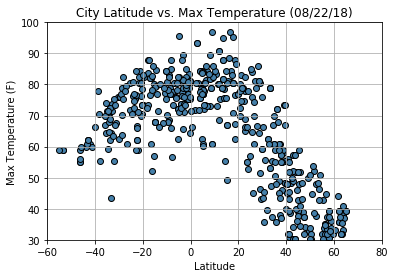

In [8]:
maxTempScatter = weather_df.iloc[:,7].tolist()
latScatter = weather_df.iloc[:,5].tolist()
plt.scatter(latScatter,maxTempScatter, marker="o", facecolors="#4580AA", edgecolors="black")
plt.grid()
plt.ylim(30,100)
plt.xlim(-60,80)
plt.title("City Latitude vs. Max Temperature (08/22/18)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

#### Latitude vs. Humidity Plot

Text(0,0.5,'Humidity (%)')

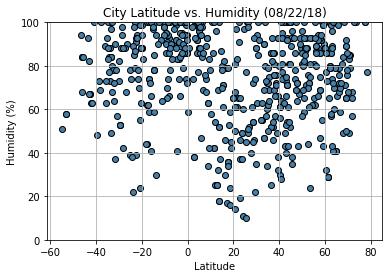

In [18]:
humidityScatter = weather_df.iloc[:,4].tolist()
latScatter = weather_df.iloc[:,5].tolist()
plt.scatter(latScatter,humidityScatter, marker="o", facecolors="#4580AA", edgecolors="black")
plt.grid()
plt.ylim(-,100)
# plt.xlim(-60,80)
plt.title("City Latitude vs. Humidity (08/22/18)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

#### Latitude vs. Cloudiness Plot

Text(0,0.5,'Cloudiness (%)')

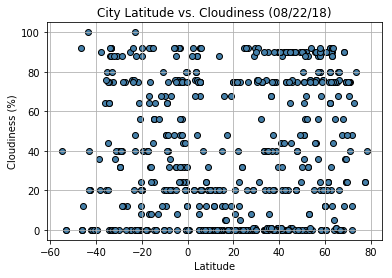

In [14]:
cloudinessScatter = weather_df.iloc[:,1].tolist()
latScatter = weather_df.iloc[:,5].tolist()
plt.scatter(latScatter,cloudinessScatter, marker="o", facecolors="#4580AA", edgecolors="black")
plt.grid()
plt.title("City Latitude vs. Cloudiness (08/22/18)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

#### Latitude vs. Wind Speed Plot

Text(0,0.5,'Wind Speed (mph)')

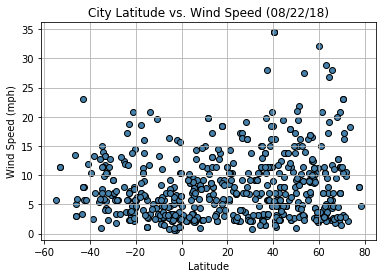

In [13]:
windSpeedScatter = weather_df.iloc[:,8].tolist()
latScatter = weather_df.iloc[:,5].tolist()
plt.scatter(latScatter,windSpeedScatter, marker="o", facecolors="#4580AA", edgecolors="black")
plt.grid()
plt.title("City Latitude vs. Wind Speed (08/22/18)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")